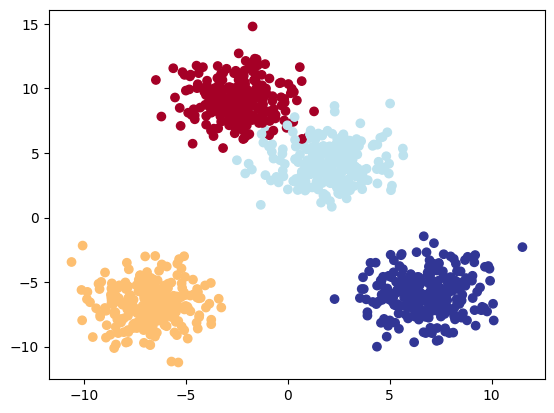

In [10]:
from icecream import ic
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

random_seed = 42

X_blobs, y_blobs = make_blobs(n_samples=1000,centers=4, n_features=4,cluster_std=1.5,random_state=random_seed)

plt.scatter(X_blobs[:,0],X_blobs[:,1],c = y_blobs,cmap=plt.cm.RdYlBu)

X_train, X_test , y_train, y_test = train_test_split(X_blobs,y_blobs,test_size=0.2,random_state=42)


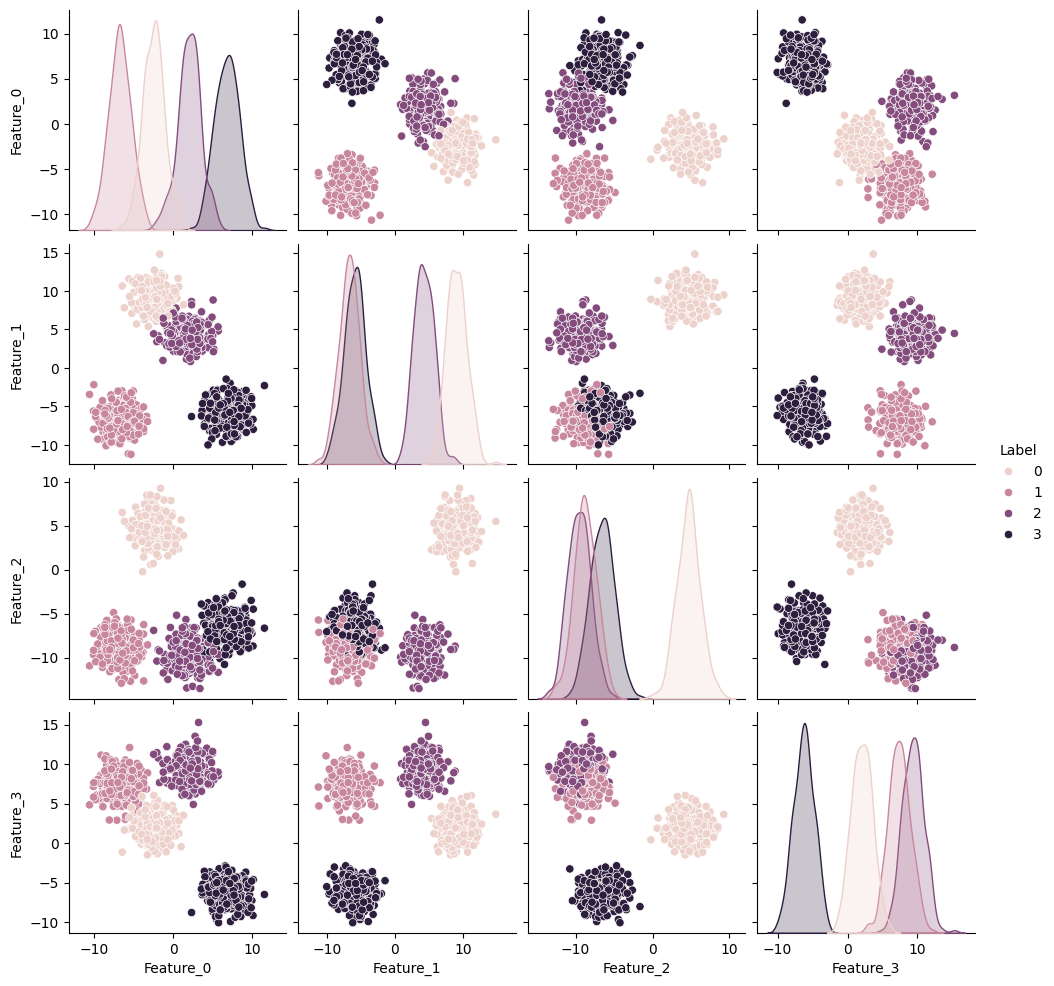

In [2]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame(X_blobs, columns=[f'Feature_{i}' for i in range(4)])
data['Label'] = y_blobs

sns.pairplot(data, hue='Label')
plt.show()

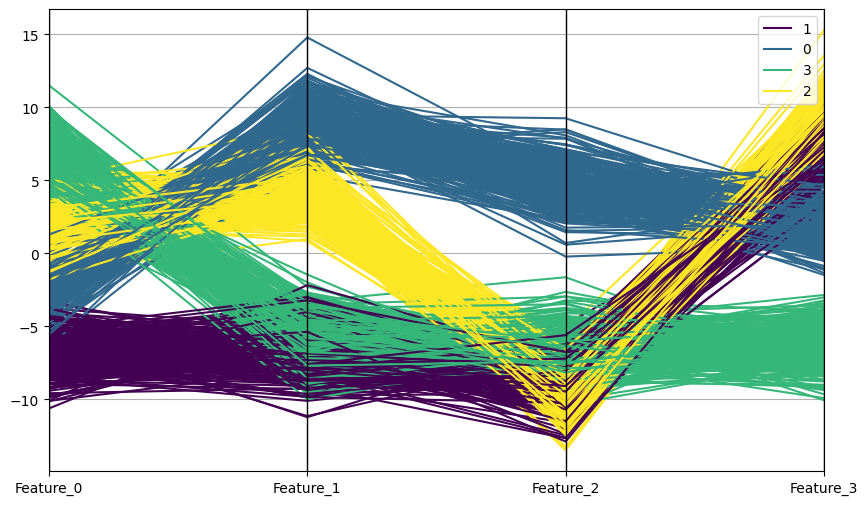

In [3]:
from pandas.plotting import parallel_coordinates

data = pd.DataFrame(X_blobs, columns=[f'Feature_{i}' for i in range(4)])
data['Label'] = y_blobs

plt.figure(figsize=(10, 6))
parallel_coordinates(data, 'Label', colormap='viridis')
plt.show()

In [4]:
import torch
from torch import nn

model = nn.Sequential(
    nn.Linear(4,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,4),
    
)


In [5]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

model.to(device)
X_train = torch.from_numpy(X_train).type(torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(torch.float32).to(device)

X_test = torch.from_numpy(X_test).type(torch.float32).to(device)
y_test = torch.from_numpy(y_test).type(torch.float32).to(device)

from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train,y_train)
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)




In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

epochs = 100

for epoch in range(epochs):
    for inputs, lables in train_loader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = loss_fn(y_pred,lables)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

ic(predicted)
accuracy = (predicted == y_test).float().mean().item()
print(f'Test Accuracy: {accuracy:.4f}')


Epoch [10/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0000
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000


ic| predicted: tensor([0, 2, 0, 1, 1, 3, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 3,
                       0, 1, 3, 1, 2, 2, 3, 3, 0, 2, 2, 3, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2,
                       0, 2, 3, 3, 3, 0, 0, 2, 2, 0, 0, 0, 3, 1, 2, 3, 1, 3, 1, 0, 0, 0, 3, 0,
                       2, 2, 1, 1, 3, 2, 2, 1, 1, 2, 0, 1, 3, 0, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1,
                       3, 1, 0, 2, 2, 0, 1, 2, 3, 3, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 3,
                       3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 1, 0, 2, 0,
                       3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0,
                       2, 0, 3, 3, 1, 3, 2, 3, 2, 3, 3, 1, 2, 0, 1, 1, 2, 0, 0, 1, 3, 3, 3, 0,
                       1, 2, 3, 0, 1, 2, 0, 1],

Epoch [100/100], Loss: 0.0000


 device='mps:0')


Test Accuracy: 1.0000
